In [1]:
#DATA
#SKU - SKU NUmber
#Std. Price ($) - Price of each unit of SKU
#On-Hand Stock ($) - Total stock on-hand as of 30th Sep'20	 
#APU (units) - Average monthly consumption (30 days) of the SKU
#APU Trend - Anticipated APU trend provided by marketing (e.g. 50% indicates 50% increase in APU consumption)
#S-OTD - Supplier On-time delivery (S-OTD) performance for the past 12 months
#Demand variability (COV) - Demand Coefficient of variance for the past 12 months
#Lead Time (days) - Lead time in days to procure the SKU

#Assumptions to be taken into consideration:
# The Minimum Order Quantity (MOQ) is equal to one lead-time demand
# The service level targeted can be assumed to be 95%
# The expiry for all the mentioned SKUs is one year

#FIND THE FOLLOWING
# Estimate the change in the inventory position to understand the working capital impact  
# Based on the marketing insights gathered, understand the potential obsolete inventory that they currently have

In [2]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pprint import pprint

In [3]:
#getting data
xls = pd.ExcelFile('2021-ascm-case-competition_school-round_data-exhibits.xlsx')
df = pd.read_excel(xls, 'Data Exhibit-2')

print(list(df.columns))
print(df.dtypes)

['SKU ', 'Std. Price ($)', 'On-Hand Stock ($)', 'APU\n(units)', 'APU Trend', 'S-OTD', 'Demand variability (COV)', 'Lead Time (days)']
SKU                         float64
Std. Price ($)              float64
On-Hand Stock ($)           float64
APU\n(units)                  int64
APU Trend                   float64
S-OTD                       float64
Demand variability (COV)    float64
Lead Time (days)              int64
dtype: object


In [4]:
def sumOfGP(a, r, n):       
    sum = 0
    i = 0
    while i < n: 
        sum = sum + a 
        a = a * r 
        i = i + 1
    return sum

df['Yearly Demand'] = sumOfGP(df['APU\n(units)'] * (1 + df['APU Trend']), 1 + df['APU Trend'], 12)
df['Initial Inventory'] = df['On-Hand Stock ($)'] / df['Std. Price ($)']
df.head()

,SKU,Std. Price ($),On-Hand Stock ($),APU\n(units),APU Trend,S-OTD,Demand variability (COV),Lead Time (days),Yearly Demand,Initial Inventory
0,14171.732125,33.762953,5837.312718,122,-0.1,0.77,1.56,23,7.878924e+02,172.891058
1,52169.042825,12.089326,1532.719476,178,0.2,0.85,1.80,12,8.454395e+03,126.782877
2,72156.257446,11.756134,4562.334137,324,-0.4,0.77,1.38,21,4.849421e+02,388.081145
3,8954.076984,8.157692,4156.895262,414,0.5,0.70,1.99,15,1.599030e+05,509.567542
4,94785.831804,5.269414,587.585764,170,1.2,0.80,0.92,15,4.006164e+06,111.508758


In [5]:
#calculating obsolete inventory
obsolete_inventory = 0
obsolete_sku = pd.DataFrame(np.empty((0, df.shape[1])))    
obsolete_sku.columns = df.columns

i = 0
for i in range(len(df)):
    if df.at[i, 'Initial Inventory'] > df.at[i, 'Yearly Demand']:
        obsolete_sku.loc[df.index[i]] = df.iloc[i]
        obsolete_inventory += (df.at[i, 'Initial Inventory'] - df.at[i, 'Yearly Demand']) * df.at[i, 'Std. Price ($)']

print("Obsolete Inventory :", obsolete_inventory, "$")
print(obsolete_sku)

Obsolete Inventory : 2211693.957036167 $
              SKU   Std. Price ($)  On-Hand Stock ($)  APU\n(units)  \
9     39145.012382        7.990871       64000.000000         130.0   
19    45569.933059       15.422959        1500.000000          10.0   
29    52607.266498        6.284259         135.637765          10.0   
37    28494.960963       23.475104       12240.000000          10.0   
41    48429.392292        5.946201        3800.000000          34.0   
...            ...             ...                ...           ...   
1907  84183.753193       11.878416       73997.389293        3494.0   
1910  43887.930399        6.769290       89048.395800        2862.0   
1943  13930.053336       16.693611      304565.781899        7414.0   
1953  29892.127347        7.462939      102512.345992        7430.0   
1962  76681.241891        5.869061       94988.795082       14892.0   

      APU Trend  S-OTD  Demand variability (COV)  Lead Time (days)  \
9          -0.4   0.80              

Months are:  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
Monthly Demands are:  [65.0, 162.5, 406.25, 1015.625, 2539.0625, 6347.65625, 15869.140625, 39672.8515625, 99182.12890625, 247955.322265625, 619888.3056640625, 1549720.7641601562]
Yearly Demand is:  2582824.6069335938


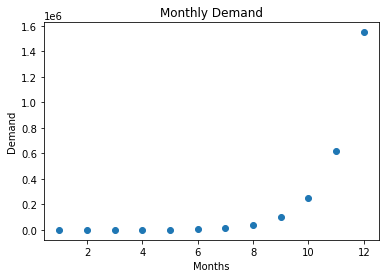

In [6]:
#Working with SKU 52169.042825	
row = 149

#Input GP data
a = df.iloc[row]['APU\n(units)'] * (1 + df.iloc[row]['APU Trend'])
r = 1 + df.iloc[row]['APU Trend']
n = 12

month = []
m_demand = []
total = 0

for i in range(1, 13):
    month.append(i)
    m_demand.append(a*r**(i-1))
    total += m_demand[i-1]
    
print("Months are: ", month)
print("Monthly Demands are: ", m_demand)
print("Yearly Demand is: ", total)

#Plotting monthly demand
plt.scatter(month, m_demand)
plt.title("Monthly Demand")
plt.xlabel("Months")
plt.ylabel("Demand")
plt.show()

[0.9505376344086022,
 1.0344086021505376,
 1.1182795698924732,
 1.2021505376344086,
 1.2860215053763442,
 1.3698924731182798,
 1.4537634408602151,
 1.5376344086021505,
 1.621505376344086,
 1.7053763440860217,
 1.789247311827957,
 1.8731182795698926,
 1.956989247311828,
 2.0408602150537636,
 2.124731182795699,
 2.2086021505376348,
 2.2924731182795703,
 2.3763440860215055,
 2.460215053763441,
 2.544086021505376,
 2.627956989247312,
 2.7118279569892474,
 2.795698924731183,
 2.8795698924731186,
 2.963440860215054,
 3.0473118279569893,
 3.131182795698925,
 3.2150537634408605,
 3.298924731182796,
 3.382795698924731,
 3.5140131807145334,
 3.6452306625043356,
 3.7764481442941378,
 3.9076656260839404,
 4.038883107873742,
 4.170100589663544,
 4.301318071453347,
 4.43253555324315,
 4.563753035032952,
 4.694970516822754,
 4.826187998612556,
 4.957405480402358,
 5.088622962192161,
 5.219840443981963,
 5.351057925771766,
 5.482275407561568,
 5.61349288935137,
 5.7447103711411724,
 5.875927852930975,

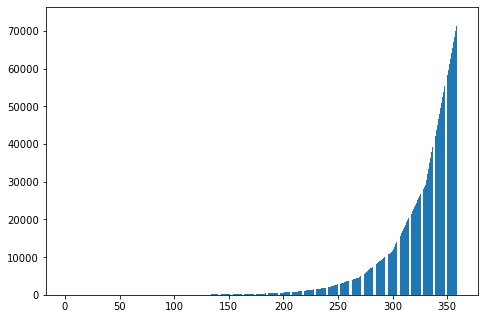

In [7]:
days = []
demand = []

#Calculating daily demand
for i in range(0, n*30):
    #Finding month for given day and its corresponding monthly demand
    m = int(i / 30)
    m_d = m_demand[m]
    
    #ASSUMPTION: Linear Distribution of demand in a month - y = a + x*b
    # a (level) = previous month's last day demand
    if i in range(0, 30): 
        #for initial month a = APU / 30 (ASSUMPTION: Earlier it was Constant Distribution)
        a = df.iloc[row]['APU\n(units)'] / 30
    else:
        a = demand[(m * 30) - 1]
    
    # b (trend) = difference in month end demands / summation of days
    slope = (m_d - 30 * a) / (30 * 31 / 2)
    demand.append(((i+1) - 30 * (m)) * slope + a)
    days.append(i + 1)
    
pprint(demand)

net_demand = [0] * 12
for i in range(0, n*30):
    month = int(i / 30)
    net_demand[month] += demand[i]
    
#pprint(net_demand)

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(days, demand)
plt.show()

In [8]:
from scipy import special

#Calculate ROQ
Z_alpha = 1.645 #as service level is 95% http://www.math.armstrong.edu/statsonline/5/5.3.2.html

def ROQ(LT_demands, row):
    m_d = np.mean(LT_demands)
    s_d = m_d / df.at[row, 'Demand variability (COV)']
    
    m_l = df.at[row, 'Lead Time (days)'] * df.at[row, 'S-OTD']
    x_l = df.at[row, 'Lead Time (days)']     
    
    ##SOURCE: 
        #https://math.stackexchange.com/questions/2560644/calculate-z-score-given-probability-using-erfinv
        #https://www.wolframalpha.com/input/?i=normal+distribution
    ##VERIFICATION:
        #https://stattrek.com/online-calculator/normal.aspx
    z_l = -np.sqrt(2)*special.erfcinv(2*df.at[row, 'S-OTD'])
    s_l = (x_l - m_l)/ z_l
    
    expected_demand = 0
    for i in LT_demands:
        expected_demand += i
        
    safety_stock = Z_alpha * np.sqrt(m_l * s_d**2 + m_d**2 * s_l**2)
    
    return expected_demand + safety_stock

In [9]:
#Calculating inventory position at start of day for given SKU
inventory = [0] * 360
inventory[0] = df.at[row, 'Initial Inventory']

for i in range(1, 360):
    inventory[i] = inventory[i-1] - demand[i-1]

for i in range(0, 360):
    print("Inventory at beginning of day {} is {}".format(i+1, inventory[i]))

Inventory at beginning of day 1 is 175.5960873478784
Inventory at beginning of day 2 is 174.64554971346982
Inventory at beginning of day 3 is 173.61114111131928
Inventory at beginning of day 4 is 172.4928615414268
Inventory at beginning of day 5 is 171.2907110037924
Inventory at beginning of day 6 is 170.00468949841607
Inventory at beginning of day 7 is 168.6347970252978
Inventory at beginning of day 8 is 167.18103358443756
Inventory at beginning of day 9 is 165.6433991758354
Inventory at beginning of day 10 is 164.02189379949132
Inventory at beginning of day 11 is 162.3165174554053
Inventory at beginning of day 12 is 160.52727014357734
Inventory at beginning of day 13 is 158.65415186400745
Inventory at beginning of day 14 is 156.6971626166956
Inventory at beginning of day 15 is 154.65630240164185
Inventory at beginning of day 16 is 152.53157121884615
Inventory at beginning of day 17 is 150.3229690683085
Inventory at beginning of day 18 is 148.03049595002895
Inventory at beginning of d

In [10]:
##MY ENDLESS TRIAL and ERROR for procuring answer from an online calculator
#from selenium import webdriver
#from bs4 import BeautifulSoup
#
#option = webdriver.ChromeOptions()
#
#driver_path = r"C:\Users\User1\Desktop\Competitions\ACSM\chromedriver.exe"
#brave_path = r"C:\Program Files\BraveSoftware\Brave-Browser\Application\brave.exe"
#
#option.binary_location = brave_path
#driver = webdriver.Chrome(executable_path= driver_path, options=option)
#driver.get("https://stattrek.com/online-calculator/normal.aspx")
#
#z_score = driver.find_element_by_id('txtValue')
#mean = driver.find_element_by_id('txtMean')
#sd = driver.find_element_by_id('txtSD')
#cumP = driver.find_element_by_id('txtProbability')
#button = driver.find_element_by_id('btnCalculate')
#
#z_score.clear()
#mean.clear()
#sd.clear()
#cumP.clear()
#
#z_score.send_keys("12")
#mean.send_keys("10.2")
#cumP.send_keys("0.85")
#button.click()
#
#zs = z_score.get_attribute('value')
#print(zs)
#sv = sd.get_attribute('value')
#print(sv)
#mv = mean.get_attribute('value')
#print(mv)
#cp = cumP.get_attribute('value')
#print(cp)

In [11]:
from scipy import special
from math import sqrt
z = -sqrt(2)*special.erfcinv(2*0.85) 
##SOURCE: 
    #https://math.stackexchange.com/questions/2560644/calculate-z-score-given-probability-using-erfinv
    #https://www.wolframalpha.com/input/?i=normal+distribution
    ##VERIFICATION:
    #https://stattrek.com/online-calculator/normal.aspx

m = 12*0.85
x = 12

sigma = (x-m)/z
print(sigma)

1.7367252138404652


In [12]:
#Finding Final Daily Inventory Levels
number_of_orders = 0
lots_ordered = 0
day_counter = 0
inventory_level = [0] * 360
arrival = [0] * 360

stockoutLoss_units = 0

inventory_level[0] = df.at[row, 'Initial Inventory']

for i in range(0, 360):
    if(i != 0):
        inventory_level[i] = inventory_level[i-1] - demand[i-1] 
        if inventory_level[i] < 0:
            stockoutLoss_units += abs(inventory_level[i])
            inventory_level[i] = 0
        inventory_level[i] += arrival[i]

    if(day_counter == 0):
        LT_demands = []
        for j in range(i, i + df.at[row, 'Lead Time (days)'] + 1):
            try:
                LT_demands.append(demand[j])
            except IndexError:
                continue
        roq = ROQ(LT_demands, row)
        if roq >= inventory_level[i]:
            number_of_orders += 1
            try:
                arrival[i + df.at[row, 'Lead Time (days)']] += sum(LT_demands)
            except IndexError:
                continue
            lots_ordered += sum(LT_demands)
            day_counter = df.at[row, 'Lead Time (days)']
    else:
        day_counter -= 1
        continue
        

        
ans = pd.DataFrame({'Inventory': inventory_level, 'Arrival': arrival})
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  
    print(ans)

        Inventory      Arrival
0      175.596087      0.00000
1      174.645550      0.00000
2      173.611141      0.00000
3      172.492862      0.00000
4      171.290711      0.00000
5      170.004689      0.00000
6      168.634797      0.00000
7      167.181034      0.00000
8      165.643399      0.00000
9      164.021894      0.00000
10     162.316517      0.00000
11     160.527270      0.00000
12     158.654152      0.00000
13     156.697163      0.00000
14     154.656302      0.00000
15     152.531571      0.00000
16     150.322969      0.00000
17     148.030496      0.00000
18     145.654152      0.00000
19     143.193937      0.00000
20     140.649851      0.00000
21     138.021894      0.00000
22     135.310066      0.00000
23     132.514367      0.00000
24     129.634797      0.00000
25     126.671356      0.00000
26     123.624044      0.00000
27     120.492862      0.00000
28     117.277808      0.00000
29     113.978883      0.00000
30     110.596087      0.00000
31     1

Number of times ordered is : 170
Units Ordered is : 14796.066249868958
Inventory Ordered is : 2026858.370124424 $
StockOut Loss is : 15150224.492053762 $
StockOut Units are : 2495096.260219658 
Total demand is : 2582824.606933594 
Service Level is : 3.3966048828259403 %


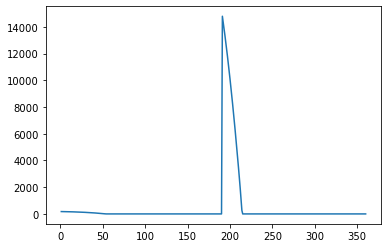

In [13]:
plt.plot(days, inventory_level)
print("Number of times ordered is : {}".format(number_of_orders))
print("Units Ordered is : {}".format(lots_ordered))
print("Inventory Ordered is : {} $".format(lots_ordered * df.at[row, 'Std. Price ($)']))
print("StockOut Loss is : {} $".format(stockoutLoss_units * df.at[i, 'Std. Price ($)']))
print("StockOut Units are : {} ".format(stockoutLoss_units))
print("Total demand is : {} ".format(sum(demand)))

print("Service Level is : {} %".format(100 - (stockoutLoss_units / sum(demand) * 100)))